In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_new = pd.read_csv('/content/tableau.csv')
# Display the first few rows to understand its structure
df_new.head()

,consultant_id,onfile_status,sales_tenure_months,sales_tenure_proper,registered_at,sales_year,report_month,team_leader_id,status,tltb_flag,cohort_group_registration,performance_tiers_monthly,report_period,monthly_sales,ytd_total_sales,avg_ytd_sales_per_consultant,performance_tier,annual_performance_tier,country
0,100014,1,0,0,8/17/2016 11:59,2015,9/30/2015,110324.0,Active,consultant,2018 prior,Non-performer,9/30/2015,0,0,0.000000,0 Non-performer,0 Non-performer,USA
1,100014,1,1,1,8/17/2016 11:59,2015,10/31/2015,110324.0,Active,consultant,2018 prior,Non-performer,10/31/2015,0,0,0.000000,0 Non-performer,0 Non-performer,USA
2,100014,1,2,2,8/17/2016 11:59,2015,11/30/2015,110324.0,Active,consultant,2018 prior,Non-performer,11/30/2015,0,0,0.000000,0 Non-performer,0 Non-performer,USA
3,100014,1,3,3,8/17/2016 11:59,2015,12/31/2015,110324.0,Active,consultant,2018 prior,Non-performer,12/31/2015,0,0,0.067416,0 Non-performer,0 Non-performer,USA
4,100014,1,4,4,8/17/2016 11:59,2016,1/31/2016,110324.0,Active,consultant,2018 prior,Sold 3+,1/31/2016,5,5,0.258427,4 Super Performer,4 Super Performer,USA


<ipython-input-17-48328462a676>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['report_month'].dt.year
<ipython-input-17-48328462a676>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['report_month'].dt.month


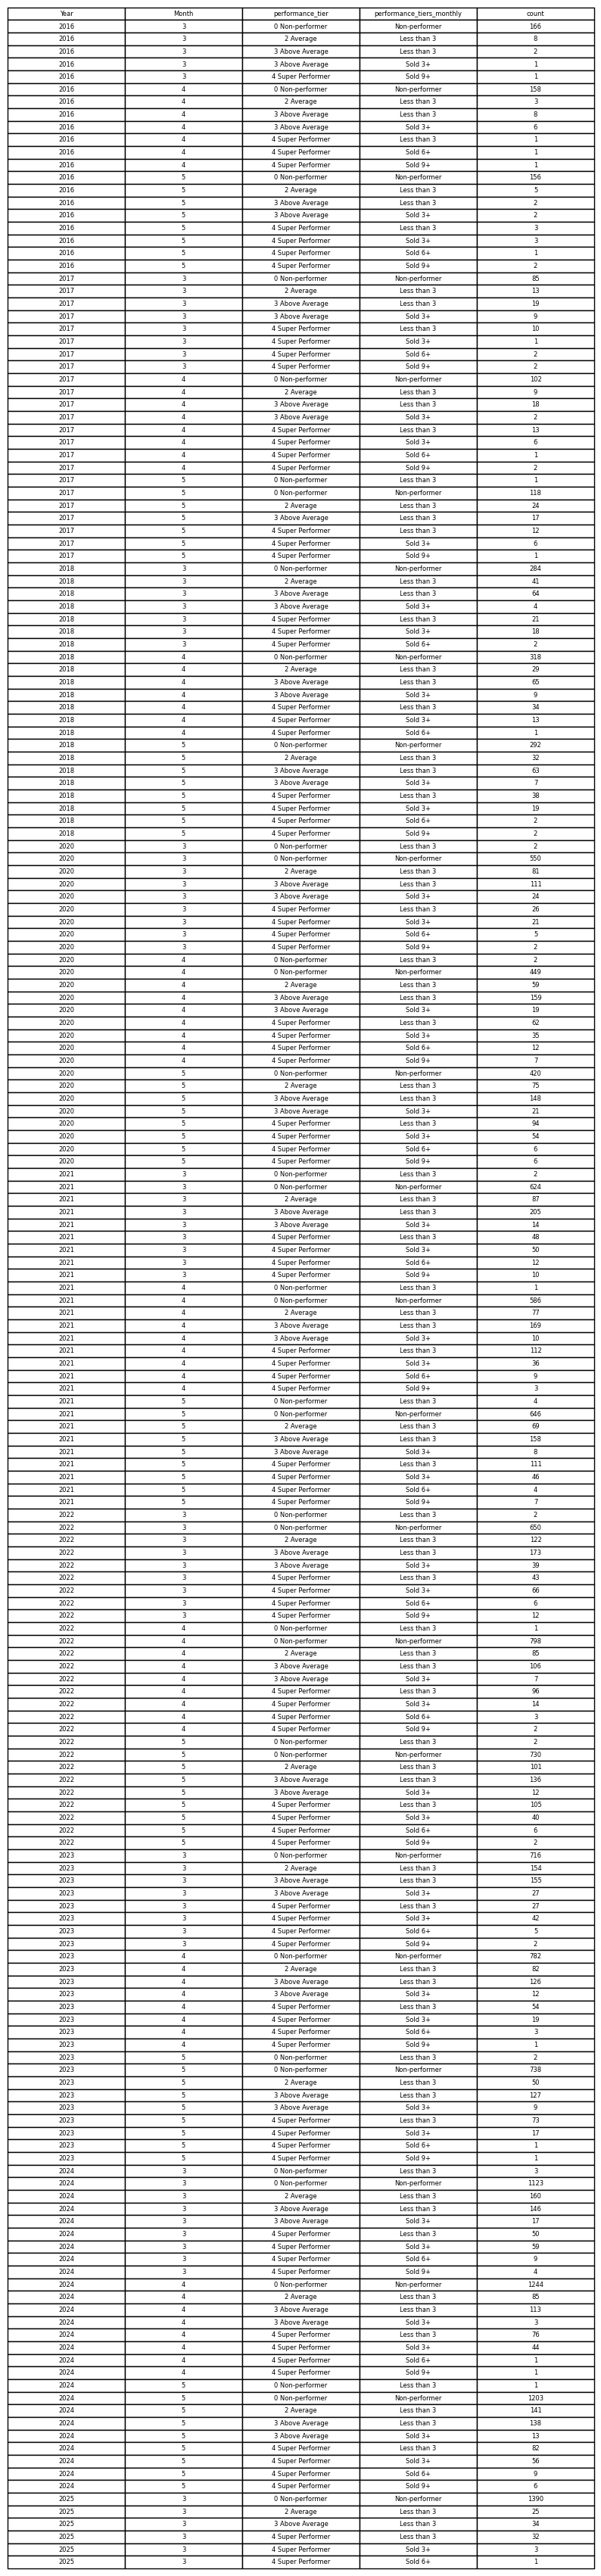

,Year,Month,performance_tier,performance_tiers_monthly,count
0,2016,3,0 Non-performer,Non-performer,166
1,2016,3,2 Average,Less than 3,8
2,2016,3,3 Above Average,Less than 3,2
3,2016,3,3 Above Average,Sold 3+,1
4,2016,3,4 Super Performer,Sold 9+,1


In [ ]:
# Import necessary libraries
import pandas as pd

# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your file path if needed)
file_path = '/content/tableau.csv'
df = pd.read_csv(file_path)

# Convert 'report_month' to datetime format
df['report_month'] = pd.to_datetime(df['report_month'], format='%m/%d/%Y')

# Filter the data for March, April, and May across all years, USA only
df_filtered = df[(df['country'] == 'USA') &
                 (df['report_month'].dt.month.isin([3, 4, 5]))]

# Create Year and Month columns for grouping
df_filtered['Year'] = df_filtered['report_month'].dt.year
df_filtered['Month'] = df_filtered['report_month'].dt.month

# Group by Year, Month, performance_tier, and performance_tiers_monthly for count
performance_tiers_monthly_by_tier = df_filtered.groupby(['Year', 'Month', 'performance_tier', 'performance_tiers_monthly']).size().reset_index(name='count')

# Display the result in Google Colab
import matplotlib.pyplot as plt

# Display the result as a table
plt.figure(figsize=(10, 6))
plt.table(cellText=performance_tiers_monthly_by_tier.values,
          colLabels=performance_tiers_monthly_by_tier.columns,
          cellLoc='center', loc='center')

# Hide axes
plt.axis('off')

performance_tiers_monthly_by_tier.head()


In [ ]:
# Save the results to a CSV file
output_file_path = '/content/sample_data.csv'
performance_tiers_monthly_by_tier.to_csv(output_file_path, index=False)

# Provide the path to the file for downloading
output_file_path


'/content/sample_data.csv'

Ensemble model

In [ ]:
# Import necessary libraries
import pandas as pd

# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your file path if needed)
file_path = '/content/tableau.csv'
df = pd.read_csv(file_path)



# Convert 'report_month' to datetime format
df['report_month'] = pd.to_datetime(df['report_month'], format='%m/%d/%Y')

# Filter the data for USA only
df_usa = df[df['country'] == 'USA'].copy()

# Group by month and sum up the monthly sales per consultant
df_usa_monthly = df_usa.groupby(['consultant_id', 'report_month'])['monthly_sales'].sum().reset_index()

# Pivot the data so that each consultant's monthly sales are in separate columns
df_usa_monthly_pivot = df_usa_monthly.pivot(index='report_month', columns='consultant_id', values='monthly_sales')

# Set the report_month as the index and ensure the frequency is set to monthly (use 'ME' instead of 'M' to avoid deprecation)
df_usa_monthly_pivot = df_usa_monthly_pivot.asfreq('ME', method='pad')  # Fill missing months if needed

# Calculate historical averages for the sales categories (3-5, 6-8, 9+ units)
sales_category_counts = df_usa.groupby(['report_month']).agg(
    _3_5=('monthly_sales', lambda x: ((x >= 3) & (x <= 5)).sum()),
    _6_8=('monthly_sales', lambda x: ((x >= 6) & (x <= 8)).sum()),
    _9_plus=('monthly_sales', lambda x: (x >= 9).sum())
).reset_index()

# Calculate the historical average for each category
avg_3_5_units = sales_category_counts['_3_5'].mean()  # Average for 3-5 units
avg_6_8_units = sales_category_counts['_6_8'].mean()  # Average for 6-8 units
avg_9_plus_units = sales_category_counts['_9_plus'].mean()  # Average for 9+ units

# Fit the ARIMA model for forecasting (adjust this step as needed)
arima_model_3plus = ARIMA(df_usa_monthly_pivot.sum(axis=1), order=(1, 1, 1))
arima_model_3plus_fit = arima_model_3plus.fit()

# Make forecasts for the next 3 months (March, April, and May)
forecast_arima_3plus = arima_model_3plus_fit.forecast(steps=3)

# Define scaling factors based on historical averages and forecasted values
scaling_factors = {
    '3-5 units': avg_3_5_units / forecast_arima_3plus[0],  # Use the first forecasted value
    '6-8 units': avg_6_8_units / forecast_arima_3plus[0],  # Adjust logic for 6-8 and 9+ units if needed
    '9+ units': avg_9_plus_units / forecast_arima_3plus[0]
}

# Apply scaling to the forecast values
forecast_arima_3plus_scaled = [forecast_arima_3plus[i] * scaling_factors['3-5 units'] for i in range(3)]

# Display the results
forecast_arima_3plus_scaled



<ipython-input-21-882d959f0bcc>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '3-5 units': avg_3_5_units / forecast_arima_3plus[0],  # Use the first forecasted value
<ipython-input-21-882d959f0bcc>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '6-8 units': avg_6_8_units / forecast_arima_3plus[0],  # Adjust logic for 6-8 and 9+ units if needed
<ipython-input-21-882d959f0bcc>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '

[42.72549019607843, 45.68205452996387, 45.92926878450317]

In [ ]:
# Re-import necessary libraries

# Pivot the data so that each consultant's monthly sales are in separate columns
df_usa_monthly_pivot = df_usa_monthly.pivot(index='report_month', columns='consultant_id', values='monthly_sales')

# Set the report_month as the index and ensure the frequency is set to monthly (use 'ME' instead of 'M' to avoid deprecation)
df_usa_monthly_pivot = df_usa_monthly_pivot.asfreq('ME', method='pad')  # Fill missing months if needed

# Calculate historical averages for the sales categories (3-5, 6-8, 9+ units)
sales_category_counts = df_usa.groupby(['report_month']).agg(
    _3_5=('monthly_sales', lambda x: ((x >= 3) & (x <= 5)).sum()),
    _6_8=('monthly_sales', lambda x: ((x >= 6) & (x <= 8)).sum()),
    _9_plus=('monthly_sales', lambda x: (x >= 9).sum())
).reset_index()

# Check the historical averages for each category
avg_3_5_units = sales_category_counts['_3_5'].mean()  # Average for 3-5 units
avg_6_8_units = sales_category_counts['_6_8'].mean()  # Average for 6-8 units
avg_9_plus_units = sales_category_counts['_9_plus'].mean()  # Average for 9+ units

# Print the historical averages to verify
print(f"Historical Averages - 3-5 units: {avg_3_5_units}, 6-8 units: {avg_6_8_units}, 9+ units: {avg_9_plus_units}")

# Fit the ARIMA model for forecasting (adjust this step as needed)
arima_model_3plus = ARIMA(df_usa_monthly_pivot.sum(axis=1), order=(1, 1, 1))
arima_model_3plus_fit = arima_model_3plus.fit()

# Make forecasts for the next 3 months (March, April, and May)
forecast_arima_3plus = arima_model_3plus_fit.forecast(steps=3)

# Print ARIMA forecasted values to verify
print(f"ARIMA Forecasted Values for 3-5 Units: {forecast_arima_3plus}")

# Similarly, calculate ARIMA forecasts for 6-8 and 9+ categories (you can follow the same approach for these categories)
arima_model_6plus = ARIMA(df_usa_monthly_pivot.sum(axis=1), order=(1, 1, 1))
arima_model_6plus_fit = arima_model_6plus.fit()
forecast_arima_6plus = arima_model_6plus_fit.forecast(steps=3)

arima_model_9plus = ARIMA(df_usa_monthly_pivot.sum(axis=1), order=(1, 1, 1))
arima_model_9plus_fit = arima_model_9plus.fit()
forecast_arima_9plus = arima_model_9plus_fit.forecast(steps=3)

# Define scaling factors based on historical averages and forecasted values for each category
scaling_factors = {
    '3-5 units': avg_3_5_units / forecast_arima_3plus[0],  # Scaling factor for 3-5 units
    '6-8 units': avg_6_8_units / forecast_arima_6plus[0],  # Scaling factor for 6-8 units
    '9+ units': avg_9_plus_units / forecast_arima_9plus[0]   # Scaling factor for 9+ units
}

# Print scaling factors to verify
print(f"Scaling Factors: {scaling_factors}")

# Apply scaling to the forecast values for each category
forecast_arima_3plus_scaled = [forecast_arima_3plus[i] * scaling_factors['3-5 units'] for i in range(3)]
forecast_arima_6plus_scaled = [forecast_arima_6plus[i] * scaling_factors['6-8 units'] for i in range(3)]
forecast_arima_9plus_scaled = [forecast_arima_9plus[i] * scaling_factors['9+ units'] for i in range(3)]

# Display the final scaled forecasts for March, April, and May
print(f"Scaled Forecast for 3-5 Units: {forecast_arima_3plus_scaled}")
print(f"Scaled Forecast for 6-8 Units: {forecast_arima_6plus_scaled}")
print(f"Scaled Forecast for 9+ Units: {forecast_arima_9plus_scaled}")


Historical Averages - 3-5 units: 42.72549019607843, 6-8 units: 6.735294117647059, 9+ units: 4.0
ARIMA Forecasted Values for 3-5 Units: 2025-04-30    713.406783
2025-05-31    762.773872
2025-06-30    766.901720
Freq: ME, Name: predicted_mean, dtype: float64
Scaling Factors: {'3-5 units': 0.0598893803673235, '6-8 units': 0.009441028984018184, '9+ units': 0.005606899309285908}
Scaled Forecast for 3-5 Units: [42.72549019607843, 45.68205452996387, 45.92926878450317]
Scaled Forecast for 6-8 Units: [6.73529411764706, 7.201370229941528, 7.240341361852612]
Scaled Forecast for 9+ Units: [4.0, 4.2767962937644, 4.299940721449586]


<ipython-input-23-708c1f028e91>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '3-5 units': avg_3_5_units / forecast_arima_3plus[0],  # Scaling factor for 3-5 units
<ipython-input-23-708c1f028e91>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '6-8 units': avg_6_8_units / forecast_arima_6plus[0],  # Scaling factor for 6-8 units
<ipython-input-23-708c1f028e91>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '9+ units': avg_9_